In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
from scipy import optimize
import matplotlib.pyplot as plt

import functions

In [3]:
pip = functions.PiPlus()

In [70]:
comp = pd.read_csv('COMPASS_d_2009.csv')
herm = pd.read_csv('HERMES_p_2009.csv')
df = pd.concat([comp, herm])

In [17]:
pipdata = df.loc[df['hadron'] == 'pi+', :]

In [18]:
pipkins = np.array(pipdata[['x', 'z', 'phT', 'Q2']])

In [19]:
pip.sivers(pipkins, 2, 2, 2, 2, 2, 2, 2)

array([0.00139287, 0.00181429, 0.00233682, 0.00279853, 0.00362094,
       0.00487984, 0.00621739, 0.00652098, 0.00305777, 0.00325126,
       0.00300023, 0.00272009, 0.00266475, 0.00287355, 0.00397921,
       0.00735364, 0.0162003 , 0.00077871, 0.00128017, 0.00180345,
       0.00235905, 0.00304852, 0.00398625, 0.00548485, 0.0083014 ,
       0.01873337])

In [20]:
pars, cov = optimize.curve_fit(pip.sivers, pipkins, pipdata['Siv'],
                               sigma=pipdata['tot_err'], method='lm')

Parameters in order of: Nu, au, bu, Ndbar, adbar, bdbar, m1

In [21]:
pars

array([ 3.58423516e-01,  1.19369737e+00,  2.10079251e-07, -2.55374861e-01,
        1.00000000e+00,  1.00000000e+00,  1.01487045e+00])

In [24]:
xdepend = pipdata.loc[pipdata['1D_dependence'] == 'x', :]

In [25]:
xdependkins = np.array(xdepend[['x', 'z', 'phT', 'Q2']])

In [27]:
yhat = pip.sivers(xdependkins, *pars)

In [35]:
np.sum(((xdepend['Siv'] - yhat)/xdepend['tot_err']) ** 2)

7.452197824594449

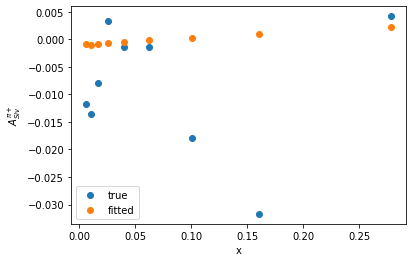

In [32]:
plt.scatter(xdepend['x'], xdepend['Siv'], label='true')
plt.scatter(xdepend['x'], yhat, label='fitted')
plt.xlabel('x')
plt.ylabel('$A^{\pi+}_{Siv}$')
plt.legend()
plt.show()

# Hermes data

In [3]:
pip = functions.PiPlus()

In [36]:
df = pd.read_csv('HERMES_p_2009.csv')

In [52]:
pipdata = df.loc[df['hadron'] == 'pi+', :]

In [54]:
pipdata['Siv'] *= .073

<ipython-input-54-793fe159329a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pipdata['Siv'] *= .073


In [55]:
pipkins = np.array(pipdata[['x', 'z', 'phT', 'Q2']])

In [56]:
pip.sivers(pipkins, 2, 2, 2, 2, 2, 2, 2)

array([0.00154386, 0.00242304, 0.00336493, 0.00447297, 0.00567464,
       0.00673405, 0.00771677, 0.00247082, 0.00225891, 0.00245674,
       0.00300155, 0.00417926, 0.00648214, 0.01086893, 0.00091061,
       0.00175433, 0.00232148, 0.00278981, 0.00356827, 0.00528942,
       0.00951794])

In [57]:
pars, cov = optimize.curve_fit(pip.sivers, pipkins, pipdata['Siv'],
                               sigma=pipdata['tot_err'], method='lm')

/home/nick/Documents/Sivers/functions.py:42: RuntimeWarning: invalid value encountered in double_scalars
  return n * x**a * (1 - x)**b * (((a + b)**(a + b))/(a**a * b**b))
/home/nick/.local/lib/python3.8/site-packages/scipy/optimize/minpack.py:828: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


Parameters in order of: Nu, au, bu, Ndbar, adbar, bdbar, m1

In [58]:
pars

array([3.30884890e+03, 5.29416420e-01, 8.07471400e-01, 3.21093441e+03,
       1.00000000e+00, 1.00000000e+00, 1.23730209e+04])

In [60]:
xdepend = pipdata.loc[pipdata['1D_dependence'] == 'x', :]

In [61]:
xdependkins = np.array(xdepend[['x', 'z', 'phT', 'Q2']])

In [68]:
yhat = pip.sivers(xdependkins, *pars)

In [63]:
np.sum(((pipdata['Siv'] - yhat)/pipdata['tot_err']) ** 2)

0.1859753919380463

In [67]:
xdependkins

array([[0.036, 0.336, 0.489, 1.281],
       [0.056, 0.356, 0.409, 1.631],
       [0.076, 0.367, 0.372, 2.017],
       [0.098, 0.376, 0.356, 2.467],
       [0.133, 0.379, 0.344, 3.203],
       [0.186, 0.379, 0.339, 4.321],
       [0.275, 0.375, 0.344, 6.179]])

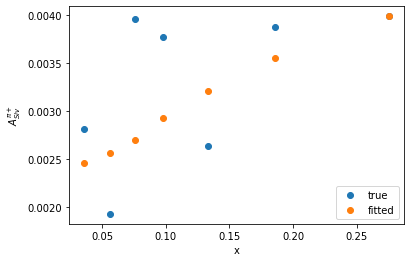

In [69]:
plt.scatter(xdepend['x'], xdepend['Siv'], label='true')
plt.scatter(xdepend['x'], yhat, label='fitted')
plt.xlabel('x')
plt.ylabel('$A^{\pi+}_{Siv}$')
plt.legend()
plt.show()

# Check $\chi^2$